# HIV Model

HK Rho

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
#define the state
init = State(R = 1000,
             L = 0,
             E = 0,
             V = 100)

#define the system
#included dt to modify time step so that the graph does not malfunction
conditions = System(gamma = 1.36, 
                    beta = 0.00027, 
                    rho = 0.1, 
                    mu = 0.00136, 
                    alpha = 0.036, 
                    delta = 0.33, 
                    sigma = 2, 
                    pi = 100, 
                    tau = 0.2,
                    q = (1 - 0.1),
                    dt = 0.1)    #the time step is 0.1 which was selected after testing different time steps that best showed the graphs

,values
gamma,1.36000
beta,0.00027
rho,0.10000
mu,0.00136
alpha,0.03600
delta,0.33000
sigma,2.00000
pi,100.00000
tau,0.20000
q,0.90000


In [37]:
#update function accepts initial state and system as parameters
def update_func(init, conditions):
    #it seems like I can only use unpack once and if it is used twice, the one written before is overriden?
    unpack(conditions)
    
    new_state = init
    
    #the changes in R,L,E,V
    drdt = gamma * tau - mu * init.R - beta * init.R * init.V
    dldt = rho * beta * init.R * init.V - mu * init.L - alpha * init.L
    dedt = (1-rho) * beta * init.R * init.V + alpha * init.L - delta * init.E
    dvdt = pi * init.E - sigma * init.V
    
    #applying the changes
    #dt is multiplied to use Euler's method
    new_state.R += drdt * dt
    new_state.L += dldt * dt
    new_state.E += dedt * dt
    new_state.V += dvdt * dt
    
    return new_state

In [38]:
def run_simulation(conditions, update_func):
    
    frame = TimeFrame(columns = init.index)
    frame.row[0] = init
    
    for t in linrange(0,200):
        frame.row[t+1] = update_func(frame.row[t], conditions)
    
    return frame

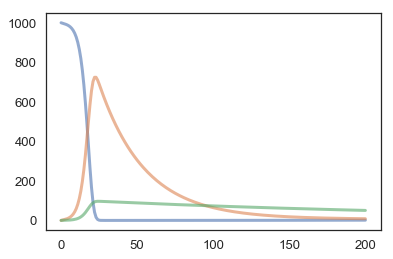

In [41]:
results = run_simulation(conditions, update_func)
plot(results.R)
plot(results.E)
plot(results.L)

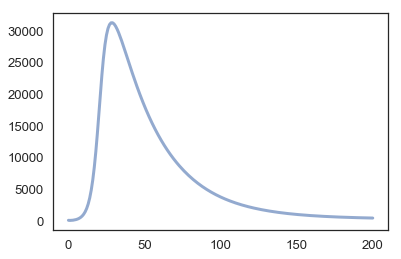

In [42]:
#the graph for V was plotted in a separate graph because it was killing the graphs for R,E,L
plot(results.V)